# **Exercices Big Data** ISEN Lille 2018

## 1) King of the houses

Premières manipulations de dataframe & corrélations

### Importation des librairies

In [90]:
# Pandas : librairie de manipulation de données
import pandas as pd
# NumPy : librairie de calcul scientifique
import numpy as np
# MatPlotLib : librairie de visualisation et graphiques
from matplotlib import pyplot as plt
# SeaBorn : librairie de graphiques avancés
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Directive pour afficher les graphiques dans Jupyter
%matplotlib inline

### Lecture du fichier CSV

In [91]:
# Imptation du dataset kc_house_data.csv
kc=pd.read_csv("kc_house_data.csv")

### Dataframe

In [92]:
# On visualise le début du dataframe
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [93]:
# Ou la fin  dataframe
kc.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [94]:
# Dimensions de la table
kc.shape

(21613, 21)

In [95]:
# Informations sur les types données
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


### Graphiques simples

Text(0.5,1,'Valeur par espace au sol')

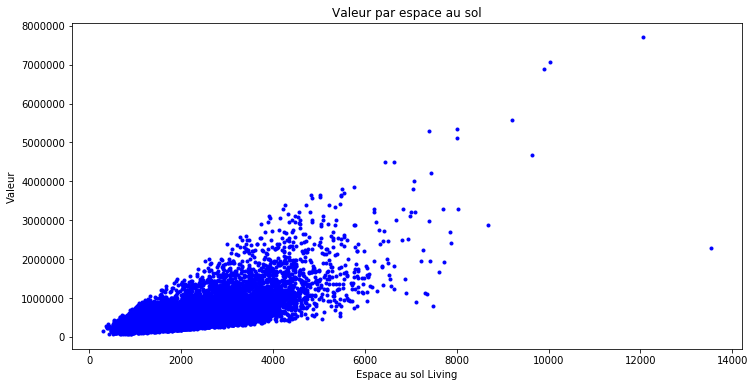

In [96]:
# On peut afficher des nuages de points

plt.figure(figsize=(12,6))                 # Dimensions de la figure
plt.plot(kc.sqft_living, kc.price,'b.')        # l'option'bo' affiche des ronds bleus
                                            # on peut utiliser 'r.' pour des points rouges, etc ...
plt.xlabel('Espace au sol Living')                # Etiquette pour l'axe Ox
plt.ylabel('Valeur')                        # Etiquette pour l'axe Oy
plt.title('Valeur par espace au sol')        # Titre du graphique

In [97]:
# On identifie une "anomalie" (trop de chambres pour un prix trop élevé)
kc[(kc.sqft_living > 10000)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3914,9808700762,20140611T000000,7062500.0,5,4.5,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
7252,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
12777,1225069038,20140505T000000,2280000.0,7,8.0,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


In [98]:
# On nettoie le dataframe de l'anomalie (via id ou via la condition)
# kc = kc[:15870] + kc[:15871]
kc = kc[(kc.sqft_living < 10000)]

Text(0.5,1,'Valeur par nb de chambres')

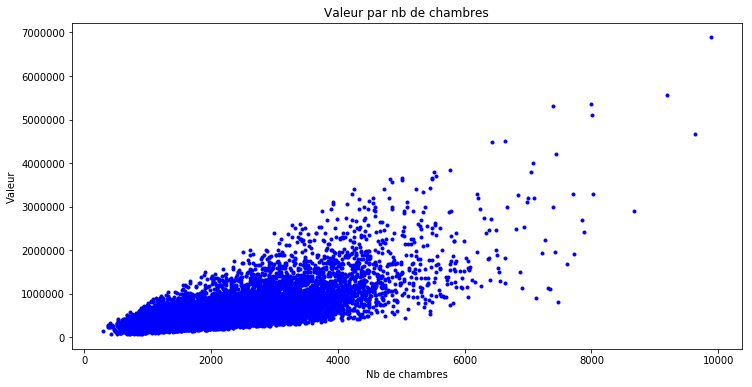

In [99]:
# On peut maintenant reprendre le nuage précédent, plus propre

plt.figure(figsize=(12,6))                 # Dimensions de la figure
plt.plot(kc.sqft_living, kc.price,'b.')        # l'option'bo' affiche des ronds bleus
plt.xlabel('Nb de chambres')                # Etiquette pour l'axe Ox
plt.ylabel('Valeur')                        # Etiquette pour l'axe Oy
plt.title('Valeur par nb de chambres')        # Titre du graphique

### Corélations

In [100]:
# On part à la recherche de corrélations (notamment entre le prix et d'autres variables, comme le nombre de chambres)
tabcorr = kc.corr(method='pearson')
# On s'intéresse juste au prix
correlations = tabcorr.price
# On enlève le calcul de corrélation prix/prix (obligatoirement égale à 1)
correlations = correlations.drop(['price'],axis=0)
# On prend la valeur absolue (une correalation négative reste une corlation)
correlations = abs(correlations)
# On trie les valeurs par correlation croissante
correlations = correlations.sort_values(ascending=False)

print(correlations)

sqft_living      0.699677
grade            0.672099
sqft_above       0.603204
sqft_living15    0.589899
bathrooms        0.524318
view             0.398123
sqft_basement    0.317979
lat              0.311069
bedrooms         0.308865
waterfront       0.262218
floors           0.258130
yr_renovated     0.120425
sqft_lot         0.088991
sqft_lot15       0.082030
yr_built         0.057517
zipcode          0.053266
condition        0.036817
long             0.022347
id               0.019006
Name: price, dtype: float64


On remarque que la plus forte corrélation concerne la surface du living. 
Par contre, la condition ou la date de construction du bâtimentsont assez peu corrélés au prix.

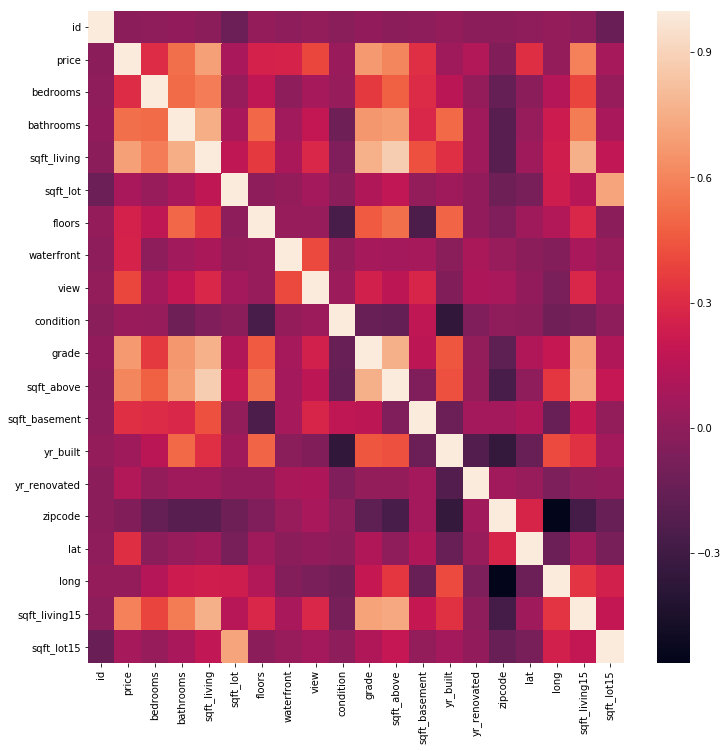

In [101]:
# On visualise les corrélations grâce à une "carte de températures" (via seaborn)
plt.figure(figsize=(12,12))
sns.heatmap(kc.corr())

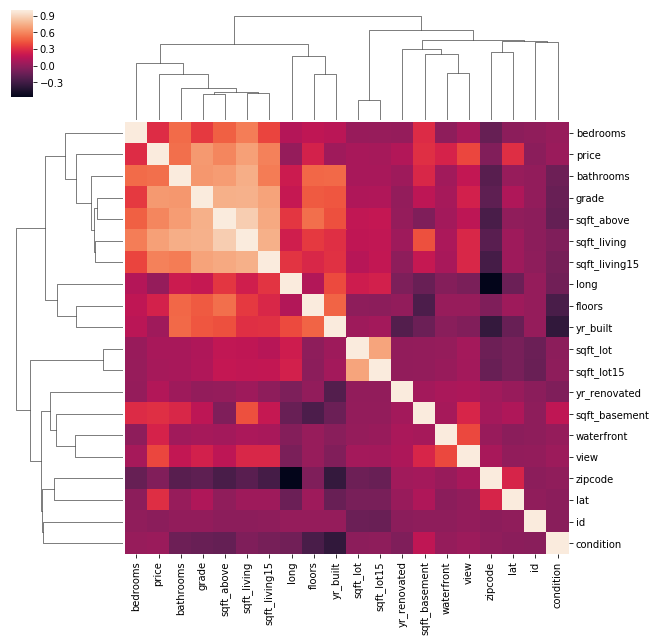

In [102]:
# Ou regroupés par clusters:
sns.clustermap(kc.corr())

In [103]:
# On peut visualiser tous les nuagese pointspar paire de paramètres :
# les opérations sont lourdes et les paramètres nuombreux, l'affichage peut prendre du temps
# sns.pairplot(kc)

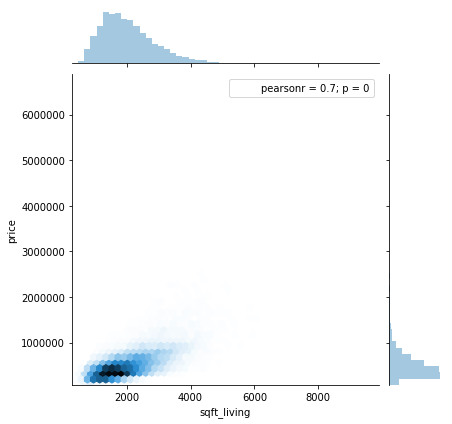

In [104]:
# On peut également tracer une estimation de la densité de probabilité d'un varaible :
print(sns.jointplot(kc.sqft_living, kc.price, kind='hex'))

In [105]:
# On enlève la colonne 'date' qui n'est pas au bon format
kc = kc.drop(['date'], axis=1)
kc.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [106]:
data_train = kc.sample(frac=0.8)          # 80% des données avec frac=0.8
data_test = kc.drop(data_train.index)     # le reste des données pour le test

In [107]:
Y_train = data_train.price
X_train = data_train.drop(['price'], axis=1)
Y_test = data_test.price
X_test = data_test.drop(['price'], axis=1)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(17288, 19)
(4322, 19)
(17288,)
(4322,)


In [108]:
lm = LinearRegression()
lm.fit(X_train, Y_train)            # apprentissage
Y_pred = lm.predict(X_test)         # prédiction sur l'ensemble de test

Text(0.5,1,'Prix reels vs prédction des prix')

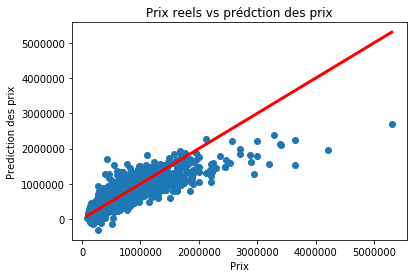

In [109]:
plt.scatter(Y_test, Y_pred)
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()], color='red', linewidth=3)
plt.xlabel("Prix")
plt.ylabel("Prediction des prix")
plt.title("Prix reels vs prédction des prix")

In [110]:
metrics.mean_squared_error(Y_test, Y_pred)

36731451909.801079

In [111]:
scoreR2 = metrics.r2_score(Y_test, Y_pred)
print(scoreR2)

0.706402931431


## 2) Dites le avec des arbres

In [112]:
# Importation du Dataset
dr = pd.read_csv("diabete.csv")

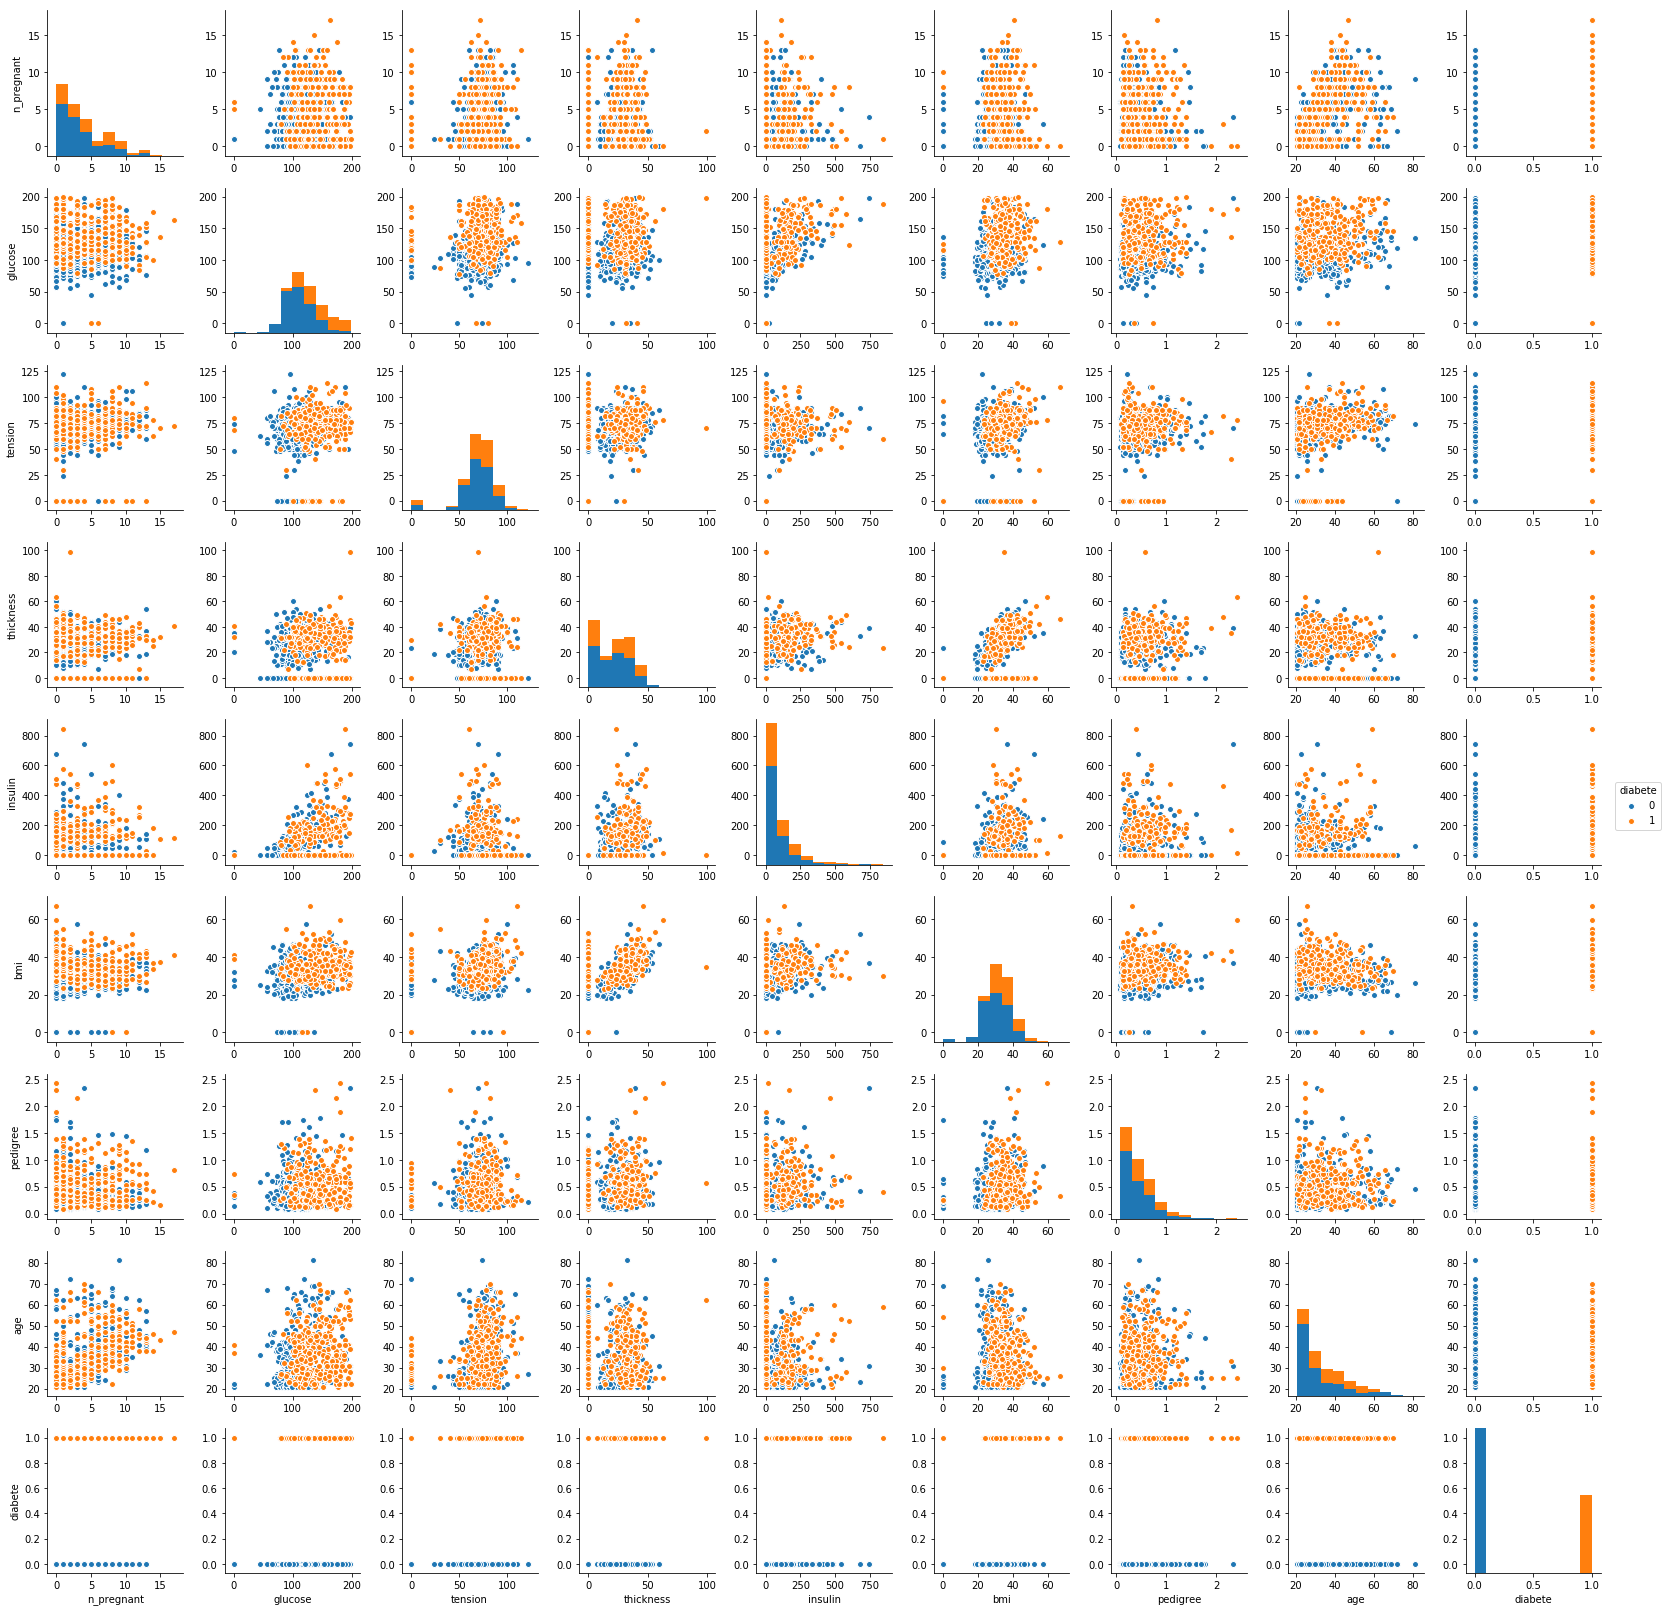

In [113]:
sns.pairplot(dr, hue="diabete")

In [114]:
dr.head()

,n_pregnant,glucose,tension,thickness,insulin,bmi,pedigree,age,diabete
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Jeux de données Training et test

On sépare le dataset en deux parties :
- un **ensemble d'apprentissage** (entre 70% et 90% des données), qui va permettre d'entraîner le modèle
- un **ensemble de test** (entre 10% et 30% des données), qui va permettre de vérifier la pertinence de l'apprentissage

In [115]:
data_train = dr.sample(frac=0.8)          # 80% des données avec frac=0.8
data_test = dr.drop(data_train.index)     # le reste des données pour le test

# On peut sauvegarder cet échantillonnage sous la forme de fichiers, 
# de manière à éviter une variabilité des résultats due au choix aléatoire
data_train.to_csv('diab_train.csv', index=False)
data_test.to_csv('diab_test.csv', index=False)

# On peut utiliser les fichiers fournis pour avoir une base équitable
data_train = pd.read_csv('diab_train.csv')
data_test = pd.read_csv('diab_test.csv')

On sépare chaque jeu en deux (X  Y), X étant le Training et Y la cible. 

In [116]:
X_train = data_train.drop(['diabete'], axis=1)
Y_train = data_train.diabete
X_test = data_test.drop(['diabete'], axis=1)
Y_test = data_test.diabete

dr.head(10)

,n_pregnant,glucose,tension,thickness,insulin,bmi,pedigree,age,diabete
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Régression logique

In [117]:
# On importe le module de régression logistique
from sklearn.linear_model import LogisticRegression

On entraîne le modle de régression logistique :

In [118]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

On peut **prédire les valeurs** sur l'ensemble de test avec le modèle entraîné :

In [119]:
Y_lr = lr.predict(X_test)
print(Y_lr)

[1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0
 0 0 1 1 0 0]


### Score et matrice de confusion :

On évalue maintenant la **pertinence des valeurs prédites** Y_lr par rapport aux valeurs attendues Y_test.

In [120]:
# Module d'évaluation du score de sklearn :
from sklearn import metrics

In [121]:
# Mesure de la pertinence (score = 0.82)
metrics.accuracy_score(Y_test, Y_lr)

0.77922077922077926

Une mesure plus fine consiste à compter le nombre de **faux positif** (valeur prédite 1 et réelle 0) et de **vrai négatif** (valeur prédite 0 et réelle 1). On utilise une **matrice de confusion** :

[[90 11]
 [23 30]]
AxesSubplot(0.125,0.125;0.62x0.755)


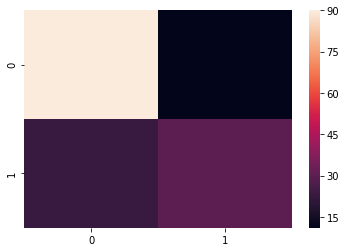

In [122]:
cm = metrics.confusion_matrix(Y_test, Y_lr)
print(cm)
print(sns.heatmap(cm))

### Arbres de décision

Pour construire un arbre de décision à partir d'un ensemble d'apprentissage, on va choisir une variable qui sépare l'ensemble en deux parties les plus distinctes en fonction d'un critère. 

In [123]:
# Module d'arbres de sklearn :
from sklearn import tree
# Pus de paramètres
from sklearn import model_selection

In [124]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
Y_dtc = dtc.predict(X_test)
metrics.accuracy_score(Y_test, Y_dtc)

0.61688311688311692

In [125]:
dtc1 = tree.DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 20)

In [126]:
dtc1.fit(X_train,Y_train)
Y_dtc1 = dtc1.predict(X_test)
metrics.accuracy_score(Y_test, Y_dtc1)

0.76623376623376627

On peut tester plusieurs combinaisons de paramètres et selectionner les meilleurs

In [127]:
param_grid = {
              'max_depth': [3, 5, 7, 9],
              'min_samples_leaf': [1, 5, 20, 50, 100, 500, 1000]
             }
estimator = tree.DecisionTreeClassifier()
dtc_gs = model_selection.GridSearchCV(estimator, param_grid)

In [128]:
dtc_gs.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5, 7, 9], 'min_samples_leaf': [1, 5, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [129]:
print(dtc_gs.best_params_)

{'max_depth': 7, 'min_samples_leaf': 20}


In [130]:
dtc2 = dtc_gs.best_estimator_

In [131]:
Y_dtc2 = dtc2.predict(X_test)
dtc2_score = metrics.accuracy_score(Y_test, Y_dtc2)
print(dtc2_score)

0.779220779221


### Forêts aléatoires

In [132]:
# Module slearn:
from sklearn import ensemble

In [133]:
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_rf = rf.predict(X_test)
rf_score = metrics.accuracy_score(Y_test, Y_rf)
print(rf_score)

0.805194805195


[[93  8]
 [22 31]]


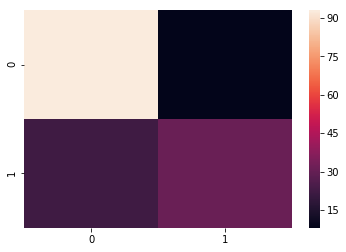

In [134]:
cm = metrics.confusion_matrix(Y_test, Y_rf)
print(cm)
sns.heatmap(cm)

On détermine les caractéristiques ayant la plus grande importance:

In [135]:
rf.feature_importances_

array([ 0.099876  ,  0.24735471,  0.10319479,  0.05834814,  0.07567491,
        0.14472157,  0.12771925,  0.14311061])

En les visualisant dans un graphique en barre pa exemple :

Text(0.5,1,'Importance des caracteristiques')

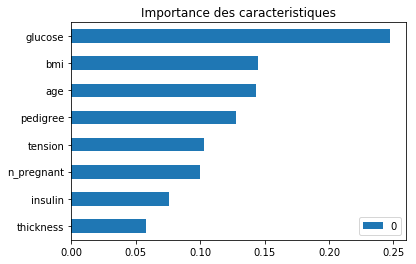

In [136]:
importances = list(zip(rf.feature_importances_, X_train.columns))
importances.sort(reverse=False)
plt.figure(figsize=(12,10))
pd.DataFrame(importances, index=[x for (_,x) in importances]).plot(kind = 'barh')
plt.title('Importance des caracteristiques')

## 3) Instant Medical formation

### Classification avec réseaux denses

On s'intéresse maintenant au Deep Learning, en se proposant de former une IA "Médecin" grâce du Deep Learning.
Le Deep Learning se fait grâce aux réseaux denses de sklearn.

In [137]:
# Importation de la librairie "neural networks" de sklearn pour la régression
from sklearn.neural_network import MLPClassifier

In [138]:
#lecture des ensembles d'apprentissage et de test
dr = pd.read_csv("diabete.csv")
data_train = dr.sample(frac=0.8)          # 80% des données avec frac=0.8
data_test = dr.drop(data_train.index)     # le reste des données pour le test


Y_train = data_train.diabete
X_train = data_train.drop(['diabete'], axis=1)
Y_test = data_test.diabete
X_test = data_test.drop(['diabete'], axis=1)

In [139]:
data_train.head()

,n_pregnant,glucose,tension,thickness,insulin,bmi,pedigree,age,diabete
4,0,137,40,35,168,43.1,2.288,33,1
187,1,128,98,41,58,32.0,1.321,33,1
357,13,129,0,30,0,39.9,0.569,44,1
656,2,101,58,35,90,21.8,0.155,22,0
184,4,141,74,0,0,27.6,0.244,40,0


In [140]:
# Création d'un réseau dense avec 2 couches cachées de 5 et 3 neurones
mlp =  MLPClassifier(hidden_layer_sizes=(5,3))

In [141]:
mlp.fit(X_train, Y_train)            # apprentissage

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 3), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [142]:
Y_pred = mlp.predict(X_test)         # prédiction sur l'ensemble de test

In [143]:
mlp_score = metrics.accuracy_score(Y_test, Y_pred)
print(mlp_score)

0.623376623377


[[77 17]
 [41 19]]


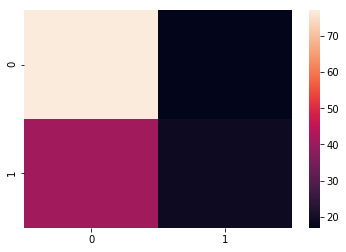

In [144]:
cm = metrics.confusion_matrix(Y_test, Y_pred)
print(cm)
sns.heatmap(cm)

0.590909090909
[[67 27]
 [36 24]]


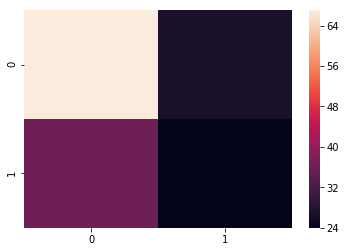

In [145]:
# Création d'un réseau dense avec 2 couches cachées de 5 et 3 neurones
mlp =  MLPClassifier(hidden_layer_sizes=(5,3))

mlp.fit(X_train, Y_train)            # apprentissage

Y_pred = mlp.predict(X_test)         # prédiction sur l'ensemble de test

mlp_score = metrics.accuracy_score(Y_test, Y_pred)
print(mlp_score)

cm = metrics.confusion_matrix(Y_test, Y_pred)
print(cm)
sns.heatmap(cm)

On remarque que les estimations sont meilleures avec le second modèle!

### Deep Learning avec Keras

Nous allons faire de même (en mieux espérons) grâce à Keras

In [146]:
# Importation des modèles standard (dense) sous Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

In [147]:
X_train = X_train.as_matrix()
X_test = X_test.as_matrix()

In [148]:
# Création du modèle

model = Sequential()
model.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [149]:
# Compilation du modèle
# Erreur quadratique
# Descente de gradient stochastique

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [150]:
# Apprentissage
# 200 itérations (epoch)
# mini-batch de 10

model.fit(X_train, Y_train, nb_epoch=200, batch_size=10)

C:\Users\qkame\AppData\Roaming\Python\Python36\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/200
614/614 [==============================] - 0s - loss: 1.2674 - acc: 0.6596     
Epoch 2/200
614/614 [==============================] - 0s - loss: 0.8263 - acc: 0.6401     
Epoch 3/200
614/614 [==============================] - 0s - loss: 0.7733 - acc: 0.6270     
Epoch 4/200
614/614 [==============================] - 0s - loss: 0.7123 - acc: 0.6319     
Epoch 5/200
614/614 [==============================] - 0s - loss: 0.6796 - acc: 0.6303     
Epoch 6/200
614/614 [==============================] - 0s - loss: 0.6754 - acc: 0.6352     
Epoch 7/200
614/614 [==============================] - 0s - loss: 0.6731 - acc: 0.6612     
Epoch 8/200
614/614 [==============================] - 0s - loss: 0.6567 - acc: 0.6596     
Epoch 9/200
614/614 [==============================] - 0s - loss: 0.6568 - acc: 0.6580     
Epoch 10/200
614/614 [==============================] - 0s - loss: 0.6470 - acc: 0.6596     
Epoch 11/200
614/614 [==============================] - 0s - loss: 0.6503 - acc

614/614 [==============================] - 0s - loss: 0.5561 - acc: 0.7003     
Epoch 177/200
614/614 [==============================] - 0s - loss: 0.5546 - acc: 0.7036     
Epoch 178/200
614/614 [==============================] - 0s - loss: 0.5527 - acc: 0.7020     
Epoch 179/200
614/614 [==============================] - 0s - loss: 0.5562 - acc: 0.7020     
Epoch 180/200
614/614 [==============================] - 0s - loss: 0.5546 - acc: 0.6922     
Epoch 181/200
614/614 [==============================] - 0s - loss: 0.5559 - acc: 0.7003     
Epoch 182/200
614/614 [==============================] - 0s - loss: 0.5533 - acc: 0.7036     
Epoch 183/200
614/614 [==============================] - 0s - loss: 0.5540 - acc: 0.6987     
Epoch 184/200
614/614 [==============================] - 0s - loss: 0.5513 - acc: 0.7003     
Epoch 185/200
614/614 [==============================] - 0s - loss: 0.5509 - acc: 0.6954     
Epoch 186/200
614/614 [==============================] - 0s - loss: 0.5536

In [151]:
# Performance du modèle
scores = model.evaluate(X_test, Y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

 32/154 [=====>........................] - ETA: 0sacc: 61.69%


La loss reste élevée avec ce modèle, pourquoi en essayer un autre :

In [152]:
model = Sequential()
model.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(11, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation="sigmoid"))

In [153]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, nb_epoch=200, batch_size=10)

C:\Users\qkame\AppData\Roaming\Python\Python36\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/200
614/614 [==============================] - 0s - loss: 3.9498 - acc: 0.6303     
Epoch 2/200
614/614 [==============================] - 0s - loss: 2.4739 - acc: 0.5814     
Epoch 3/200
614/614 [==============================] - 0s - loss: 0.6845 - acc: 0.5863     
Epoch 4/200
614/614 [==============================] - 0s - loss: 0.6408 - acc: 0.5733     
Epoch 5/200
614/614 [==============================] - 0s - loss: 0.6339 - acc: 0.6124     
Epoch 6/200
614/614 [==============================] - 0s - loss: 0.6340 - acc: 0.6612     
Epoch 7/200
614/614 [==============================] - 0s - loss: 0.6318 - acc: 0.6612     
Epoch 8/200
614/614 [==============================] - 0s - loss: 0.6220 - acc: 0.6612     
Epoch 9/200
614/614 [==============================] - 0s - loss: 0.6219 - acc: 0.6612     
Epoch 10/200
614/614 [==============================] - 0s - loss: 0.6124 - acc: 0.6612     
Epoch 11/200
614/614 [==============================] - 0s - loss: 0.6104 - acc

614/614 [==============================] - 0s - loss: 0.5321 - acc: 0.6922     
Epoch 177/200
614/614 [==============================] - 0s - loss: 0.5189 - acc: 0.7264     
Epoch 178/200
614/614 [==============================] - 0s - loss: 0.5175 - acc: 0.7117     
Epoch 179/200
614/614 [==============================] - 0s - loss: 0.5217 - acc: 0.7248     
Epoch 180/200
614/614 [==============================] - 0s - loss: 0.5198 - acc: 0.7248     
Epoch 181/200
614/614 [==============================] - 0s - loss: 0.5208 - acc: 0.7215     
Epoch 182/200
614/614 [==============================] - 0s - loss: 0.5242 - acc: 0.7182     
Epoch 183/200
614/614 [==============================] - 0s - loss: 0.5249 - acc: 0.7231     
Epoch 184/200
614/614 [==============================] - 0s - loss: 0.5222 - acc: 0.7296     
Epoch 185/200
614/614 [==============================] - 0s - loss: 0.5367 - acc: 0.7117     
Epoch 186/200
614/614 [==============================] - 0s - loss: 0.5186

In [154]:
scores = model.evaluate(X_test, Y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

 32/154 [=====>........................] - ETA: 0sacc: 62.34%


## 4) Jetons un oeil au Réseaux Convolutionnels

### Reconnaissance d'objets par les images (Réseaux convolutionnels)

In [155]:
# Import du dataset officiel Keras
from keras.datasets import cifar10
# Autres types de couches :
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [156]:
# Importation des données MNIST
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Les données sont séparées en un set d'apprentissage et un set de test
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [157]:
# Redimensionnement des images [echantillon][canaux][largeur][hauteur]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [158]:
num_classes = 10

# Normalisation entre 0 et 1
x_train = x_train / 255
x_test = x_test / 255

# Encodage des sorties en catégories
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [159]:
# Réseau convolutionnel simple
model = Sequential()

model.add(Convolution2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(32, (3, 3)))  
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))   
 
model.add(Convolution2D(64, (3, 3))) 
model.add(Activation('relu'))     
model.add(Convolution2D(64, (3, 3)))     
model.add(Activation('relu'))     
model.add(MaxPooling2D(pool_size=(2, 2)))     
model.add(Dropout(0.25))
                
model.add(Flatten())
model.add(Dense(200)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5))      
model.add(Dense(num_classes)) 
model.add(Activation('softmax'))

# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Impression du modèle
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
__________

In [160]:
# Apprentissage
model.fit(x_train, y_train, validation_data=(x_test, y_test), nb_epoch=10, batch_size=200, verbose=2)

C:\Users\qkame\AppData\Roaming\Python\Python36\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
129s - loss: 1.8064 - acc: 0.3284 - val_loss: 1.3944 - val_acc: 0.4916
Epoch 2/10
122s - loss: 1.3951 - acc: 0.4946 - val_loss: 1.2332 - val_acc: 0.5536
Epoch 3/10
124s - loss: 1.2284 - acc: 0.5618 - val_loss: 1.0653 - val_acc: 0.6205
Epoch 4/10
125s - loss: 1.1135 - acc: 0.6072 - val_loss: 1.0418 - val_acc: 0.6327
Epoch 5/10
124s - loss: 1.0274 - acc: 0.6384 - val_loss: 0.9075 - val_acc: 0.6815
Epoch 6/10
122s - loss: 0.9575 - acc: 0.6626 - val_loss: 0.8457 - val_acc: 0.7069
Epoch 7/10
122s - loss: 0.9015 - acc: 0.6824 - val_loss: 0.8117 - val_acc: 0.7154
Epoch 8/10
122s - loss: 0.8654 - acc: 0.6936 - val_loss: 0.7862 - val_acc: 0.7266
Epoch 9/10
122s - loss: 0.8238 - acc: 0.7125 - val_loss: 0.7594 - val_acc: 0.7364
Epoch 10/10
123s - loss: 0.7988 - acc: 0.7202 - val_loss: 0.7406 - val_acc: 0.7414


In [161]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 74.14%


In [162]:
# Le dataset CIFAR10 est intégré dans Keras
from keras.datasets import cifar10
# Chargement des données
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [164]:
# Modèle perceptron multicouche simple
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

# Redimensionnement de chaque image 28*28 en un vecteur de 784 éléments
num_pixels = X_train.shape[1] * X_train.shape[2] * X_train.shape[3]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# Normalisation entre 0 et 1
X_train = X_train / 255
X_test = X_test / 255

# Normalisation des sorties
# Par exemple 2 -> [0,0,1,0,0,0,0,0,0,0]
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [165]:
# Création d'un modèle multicouche (MLP)
model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, init='normal', activation='relu'))
model.add(Dense(num_classes, init='normal', activation='softmax'))

# Compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 3072)              9440256   
_________________________________________________________________
dense_17 (Dense)             (None, 10)                30730     
Total params: 9,470,986
Trainable params: 9,470,986
Non-trainable params: 0
_________________________________________________________________


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3072, input_dim=3072, activation="relu", kernel_initializer="normal")`
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="normal")`
  after removing the cwd from sys.path.


In [166]:
# Entrainement
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

C:\Users\qkame\AppData\Roaming\Python\Python36\site-packages\keras\models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
57s - loss: 13.0522 - acc: 0.1420 - val_loss: 13.0451 - val_acc: 0.1541
Epoch 2/10
57s - loss: 13.1036 - acc: 0.1505 - val_loss: 13.0438 - val_acc: 0.1633
Epoch 3/10
57s - loss: 13.0384 - acc: 0.1594 - val_loss: 13.0549 - val_acc: 0.1474
Epoch 4/10
56s - loss: 13.0436 - acc: 0.1602 - val_loss: 12.9709 - val_acc: 0.1748
Epoch 5/10
56s - loss: 13.0074 - acc: 0.1677 - val_loss: 12.9945 - val_acc: 0.1655
Epoch 6/10
56s - loss: 12.9995 - acc: 0.1700 - val_loss: 12.9792 - val_acc: 0.1721
Epoch 7/10
56s - loss: 12.9826 - acc: 0.1706 - val_loss: 13.1019 - val_acc: 0.1417
Epoch 8/10
57s - loss: 12.9084 - acc: 0.1671 - val_loss: 10.6446 - val_acc: 0.1961
Epoch 9/10
56s - loss: 4.6921 - acc: 0.2810 - val_loss: 1.7249 - val_acc: 0.3799
Epoch 10/10
57s - loss: 1.6548 - acc: 0.4055 - val_loss: 1.6299 - val_acc: 0.4196


In [167]:
# Prediction
y_mlp = model.predict(X_test)

In [168]:
# Evaluation sur l'ensemble de test
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 41.96%


## 5) Good News, Bad News, Ugly News

In [47]:
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.datasets import reuters  
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
import pandas as pd
import numpy
import random

top_words = 30000
max_words = 2376
num_classes = 46
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=top_words)

In [48]:
# Padding sur les entrées
X_train = sequence.pad_sequences(X_train, maxlen=max_words, padding='post')
X_test = sequence.pad_sequences(X_test, maxlen=max_words, padding='post')

In [49]:
# Encodage des sorties en catégories
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [50]:
print(X_test[0])
print(y_train[0])

[   1    4 1378 ...,    0    0    0]
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


In [51]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(46, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 2376, 32)          960000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 76032)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 250)               19008250  
_________________________________________________________________
dense_6 (Dense)              (None, 46)                11546     
Total params: 19,979,796
Trainable params: 19,979,796
Non-trainable params: 0
_________________________________________________________________
None


In [52]:
# Apprentissage
model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=2)


Epoch 1/10
34s - loss: 2.7036 - acc: 0.3469
Epoch 2/10
34s - loss: 1.9834 - acc: 0.3643
Epoch 3/10
34s - loss: 1.1402 - acc: 0.7039
Epoch 4/10
34s - loss: 0.6134 - acc: 0.8651
Epoch 5/10
34s - loss: 0.3842 - acc: 0.9194
Epoch 6/10
35s - loss: 0.2719 - acc: 0.9422
Epoch 7/10
35s - loss: 0.2005 - acc: 0.9526
Epoch 8/10
34s - loss: 0.1675 - acc: 0.9517
Epoch 9/10
34s - loss: 0.1394 - acc: 0.9556
Epoch 10/10
34s - loss: 0.1242 - acc: 0.9578


In [53]:
# Evaluation
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 70.17%


In [54]:
Y_mlp = model.predict(X_test)

In [61]:
ir = random.randint(1, X_test.shape[0])
print(Y_mlp[ir])

[  2.24058999e-06   1.05998618e-06   2.63338737e-08   3.27758461e-01
   6.43649080e-04   2.06350364e-07   6.29806252e-08   1.04118744e-05
   1.37502589e-04   5.85587898e-08   4.45059555e-07   8.69956125e-08
   4.95873246e-06   7.56595053e-09   3.46508358e-07   2.14921258e-07
   4.79446783e-07   3.79867657e-07   1.06203419e-08   2.16155313e-05
   2.52656810e-06   2.29591333e-08   2.40769413e-08   1.03930381e-06
   4.58362109e-07   9.27711099e-08   3.31158674e-08   7.79126879e-07
   2.27341786e-07   3.22581741e-07   6.89876629e-07   1.40075133e-06
   1.12255833e-07   4.68525798e-07   2.63031581e-07   1.91215634e-07
   2.42216032e-07   2.89011808e-07   1.87151763e-05   4.99750013e-06
   1.45091775e-07   5.15100709e-08   1.85531860e-07   2.02864996e-08
   5.71193709e-07   6.46854161e-08]


On remarque que pour cet élément random a, selon le modèle, une plus forte probabilité (32 %) d'être de type 4

## 5) Mon propre Dataset

Pour analyser un dataset, j'ai choisi des données de réponses à un questionnaires, soumis à des étudiants.

Le but était de prédire, par exemple, si l'étudiant était heureux sans lui demander directement.

Mon analyse n'a pas été concluante à cause de données au mauvais format et peu précise (échelle de 0 à 5). Les corélations étaient assez faibles. Vous trouverez ci-joint le début d'une analyse de corrélation.
J'avais également tenté d'utiliser un CNN pour effectuer une classification, sans succès.